BloomTech Data Science

*Unit 2, Sprint 1, Module 4*

---

# Module Project: Logistic Regression

Do you like burritos? 🌯 You're in luck then, because in this project you'll create a model to predict whether a burrito is `'Great'`.

The dataset for this assignment comes from [Scott Cole](https://srcole.github.io/100burritos/), a San Diego-based data scientist and burrito enthusiast.

## Directions

The tasks for this project are the following:

- **Task 1:** Import `csv` file using `wrangle` function.
- **Task 2:** Conduct exploratory data analysis (EDA), and modify `wrangle` function .
- **Task 3:** Split data into feature matrix `X` and target vector `y`.
- **Task 4:** Split feature matrix `X` and target vector `y` into training and test sets.
- **Task 5:** Establish the baseline accuracy score for your dataset.
- **Task 6:** Build `model_logr` using a pipeline that includes three transfomers and `LogisticRegression` predictor. Train model on `X_train` and `X_test`.
- **Task 7:** Calculate the training and test accuracy score for your model.
- **Task 8:** Create a horizontal bar chart showing the 10 most influencial features for your  model.
- **Task 9:** Demonstrate and explain the differences between `model_lr.predict()` and `model_lr.predict_proba()`.

**Note**

You should limit yourself to the following libraries:

- `category_encoders`
- `matplotlib`
- `pandas`
- `sklearn`

In [ ]:
!pip install category_encoders==2.*

In [2]:
# libraries
from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer # transformer
from sklearn.linear_model import LogisticRegression # predictor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler # transformer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# I. Wrangle Data

In [ ]:
import pandas as pd


In [21]:
def wrangle(filepath):
    # Import w/ DateTimeIndex
    df = pd.read_csv(filepath,
                     parse_dates=['Date'],
                     index_col='Date')

    # Drop unrated burritos
    df.dropna(subset=['overall'], inplace=True)

    # Derive binary classification target:
    # We define a 'Great' burrito as having an
    # overall rating of 4 or higher, on a 5 point scale
    df['Great'] = (df['overall'] >= 4).astype(int)

    # Drop high cardinality categoricals
    df = df.drop(columns=['Notes', 'Location', 'Address', 'URL', 'Neighborhood'])

    # Drop columns to prevent "leakage"
    df = df.drop(columns=['Rec', 'overall'])

    # drop column with zero non-null values
    df = df.drop('Queso', axis=1)

    # binary encoding
    # loop through all object columns
    for col in df.select_dtypes(include=['object']).columns:
      # replace 'x' or 'X' with 1, NaN and other values with 0
      if col not in ['Burrito', 'Reviewer']:
        df[col] = np.where(df[col].str.contains('x|X', case=False, na=False), 1, 0).astype(int)

    # burrito cardinality engineering 4 new features
    # list of features to create
    features = ['california', 'asada', 'surf', 'carnitas']
    # create binary features
    for feature in features:
      df[feature] = np.where(df['Burrito'].str.contains(feature, case=False, na=False), 1, 0).astype(int)

    # drop the burrito column
    df = df.drop('Burrito', axis=1)

    return df


**Task 1:** Use the above `wrangle` function to import the `burritos.csv` file into a DataFrame named `df`.

In [22]:
filepath = "https://raw.githubusercontent.com/bloominstituteoftechnology/DS-Unit-2-Linear-Models/master/data/burritos/burritos.csv"
df = wrangle(filepath)
df

,Yelp,Google,Chips,Cost,Hunger,Mass (g),Density (g/mL),Length,Circum,Volume,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap,Reviewer,Unreliable,NonSD,Beef,Pico,Guac,Cheese,Fries,Sour cream,Pork,Chicken,Shrimp,Fish,Rice,Beans,Lettuce,Tomato,Bell peper,Carrots,Cabbage,Sauce,Salsa.1,Cilantro,Onion,Taquito,Pineapple,Ham,Chile relleno,Nopales,Lobster,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini,Great,california,asada,surf,carnitas
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-18,3.5,4.2,0,6.49,3.0,NaN,NaN,NaN,NaN,NaN,3.0,5.0,3.0,3.5,4.0,4.0,4.0,4.0,4.0,Scott,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2016-01-24,3.5,3.3,0,5.45,3.5,NaN,NaN,NaN,NaN,NaN,2.0,3.5,2.5,2.5,2.0,4.0,3.5,2.5,5.0,Scott,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2016-01-24,NaN,NaN,0,4.85,1.5,NaN,NaN,NaN,NaN,NaN,3.0,2.0,2.5,3.0,4.5,4.0,3.0,3.0,5.0,Emily,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2016-01-24,NaN,NaN,0,5.25,2.0,NaN,NaN,NaN,NaN,NaN,3.0,2.0,3.5,3.0,4.0,5.0,4.0,4.0,5.0,Ricardo,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2016-01-27,4.0,3.8,1,6.59,4.0,NaN,NaN,NaN,NaN,NaN,4.0,5.0,4.0,3.5,4.5,5.0,2.5,4.5,4.0,Scott,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-27,NaN,NaN,0,6.00,1.0,NaN,NaN,17.0,20.5,0.57,5.0,4.0,3.5,NaN,4.0,4.0,2.0,2.0,5.0,Anon,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2019-08-27,NaN,NaN,0,6.00,4.0,NaN,NaN,19.0,26.0,1.02,4.0,5.0,NaN,3.5,4.0,4.0,5.0,4.0,3.0,Bonnie,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2019-08-27,NaN,NaN,0,7.90,3.0,NaN,NaN,20.0,22.0,0.77,4.0,4.0,4.0,3.7,3.0,2.0,3.5,4.0,4.5,Scott,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


During your exploratory data analysis, note that there are several columns whose data type is `object` but that seem to be a binary encoding. For example, `df['Beef'].head()` returns:

```
0      x
1      x
2    NaN
3      x
4      x
Name: Beef, dtype: object
```

**Task 2:** Change the `wrangle` function so that these columns are properly encoded as `0` and `1`s. Be sure your code handles upper- and lowercase `X`s, and `NaN`s.

In [13]:
# Conduct your exploratory data analysis here
# And modify the `wrangle` function above.
df['Beef'].head()

# columns to encode as binary
# Chips,

,Beef
Date,
2016-01-18,1
2016-01-24,1
2016-01-24,0
2016-01-24,1
2016-01-27,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 421 entries, 2016-01-18 to 2019-08-27
Data columns (total 58 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Burrito         421 non-null    object 
 1   Yelp            87 non-null     float64
 2   Google          87 non-null     float64
 3   Chips           421 non-null    int64  
 4   Cost            414 non-null    float64
 5   Hunger          418 non-null    float64
 6   Mass (g)        22 non-null     float64
 7   Density (g/mL)  22 non-null     float64
 8   Length          283 non-null    float64
 9   Circum          281 non-null    float64
 10  Volume          281 non-null    float64
 11  Tortilla        421 non-null    float64
 12  Temp            401 non-null    float64
 13  Meat            407 non-null    float64
 14  Fillings        418 non-null    float64
 15  Meat:filling    412 non-null    float64
 16  Uniformity      419 non-null    float64
 17  Salsa           

If you explore the `'Burrito'` column of `df`, you'll notice that it's a high-cardinality categorical feature. You'll also notice that there's a lot of overlap between the categories.

**Stretch Goal:** Change the `wrangle` function above so that it engineers four new features: `'california'`, `'asada'`, `'surf'`, and `'carnitas'`. Each row should have a `1` or `0` based on the text information in the `'Burrito'` column. For example, here's how the first 5 rows of the dataset would look.

| **Burrito** | **california** | **asada** | **surf** | **carnitas** |
| :---------- | :------------: | :-------: | :------: | :----------: |
| California  |       1        |     0     |    0     |      0       |
| California  |       1        |     0     |    0     |      0       |
|  Carnitas   |       0        |     0     |    0     |      1       |
| Carne asada |       0        |     1     |    0     |      0       |
| California  |       1        |     0     |    0     |      0       |

**Note:** Be sure to also drop the `'Burrito'` once you've engineered your new features.

In [16]:
# Conduct your exploratory data analysis here
# And modify the `wrangle` function above.
df['Burrito'].nunique()

132

In [18]:
df['Burrito'].unique()

array(['California ', 'Carnitas', 'Carne asada', 'California',
       'combo chicken', 'Monster California', 'Carne Asada',
       'Surf & Turf', 'Chile verde pork', 'battered fish ',
       'Surf and turf ', 'Adobada ', 'Barbacoa', '2 in 1', 'Adobado',
       'Shredded beef', 'Hawaiian', 'Bandido', 'Campeon', 'carne asada',
       'California chicken', 'Azteca', 'Lobster', 'Al pastor', 'Custom',
       'Machaca', 'Quesaburro', 'Philly ', 'Quesa', 'Surf and turf',
       'Mahi', 'Addiction', 'Oaxacalifornia', "Deborah's special",
       'Chicken nopalito', 'Adobada', 'Chicken', 'California Everything',
       'Chile relleno and carnitas', 'California (only cheese)', 'Fish',
       'Chimichanga beef', 'Pastor', 'El Hawaiiano ', 'Shrimp',
       'El Rusio', 'Bacon breakfast', 'Chile Relleno', 'Bomb', 'Arizona',
       'California Burrito', '619 Burrito Original', 'Chicken asada',
       'Carne adobada ', 'Bean and cheese', 'Pokirrito classic ',
       'Mauna Lani', 'Especial ', 'Ranchero

# II. Split Data

**Task 3:** Split your dataset into the feature matrix `X` and the target vector `y`. You want to predict `'Great'`.

In [23]:
# split target vector from our feature matrix
target = 'Great'
X = df.drop(columns=target)
y = df[target]

In [24]:
X.shape, y.shape

((421, 60), (421,))

In [25]:
X.index.max(), X.index.min()

(Timestamp('2026-04-25 00:00:00'), Timestamp('2011-05-16 00:00:00'))

**Task 4:** Split `X` and `y` into a training set (`X_train`, `y_train`) and a test set (`X_test`, `y_test`).

- Your training set should include data from 2016 through 2017.
- Your test set should include data from 2018 and later.

In [26]:
# define date ranges
train_start = '2016-01-01'
train_end = '2017-12-31'
test_start = '2018-01-01'

# create masks for training and test set
train_mask = (X.index >= train_start) & (X.index <= train_end)
test_mask = (X.index >= test_start)

X_train, y_train = X.loc[train_mask], y.loc[train_mask]
X_test, y_test = X.loc[test_mask], y.loc[test_mask]

# Check the results
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
print("\nX_train date range:", X_train.index.min(), "to", X_train.index.max())
print("X_test date range:", X_test.index.min(), "to", X_test.index.max())

X_train shape: (381, 60)
y_train shape: (381,)
X_test shape: (38, 60)
y_test shape: (38,)

X_train date range: 2016-01-18 00:00:00 to 2017-12-29 00:00:00
X_test date range: 2018-01-02 00:00:00 to 2026-04-25 00:00:00


# III. Establish Baseline

**Task 5:** Since this is a **classification** problem, you should establish a baseline accuracy score. Figure out what is the majority class in `y_train` and what percentage of your training observations it represents.

In [30]:
y_train.value_counts(normalize=True)

,proportion
Great,
0,0.582677
1,0.417323


In [31]:
baseline_acc = y_train.value_counts(normalize=True).max()
print('Baseline Accuracy Score:', baseline_acc)

Baseline Accuracy Score: 0.5826771653543307


# IV. Build Model

**Task 6:** Build a `Pipeline` named `model_logr`, and fit it to your training data. Your pipeline should include:

- a `OneHotEncoder` transformer for categorical features,
- a `SimpleImputer` transformer to deal with missing values,
- a [`StandarScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) transfomer (which often improves performance in a logistic regression model), and
- a `LogisticRegression` predictor.

In [32]:
model_logr = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    LogisticRegression()
)

model_logr.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Reviewer'], use_cat_names=True)),
                ('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

# IV. Check Metrics

**Task 7:** Calculate the training and test accuracy score for `model_logr`.

In [34]:
training_acc = model_logr.score(X_train, y_train)
test_acc = model_logr.score(X_test, y_test)

print('Training Accuracy:', training_acc)
print('Test Accuracy:', test_acc)

Training Accuracy: 0.9711286089238845
Test Accuracy: 0.7894736842105263


# V. Communicate Results

**Task 8:** Create a horizontal barchart that plots the 10 most important coefficients for `model_logr`, sorted by absolute value.

**Note:** Since you created your model using a `Pipeline`, you'll need to use the [`named_steps`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) attribute to access the coefficients in your `LogisticRegression` predictor. Be sure to look at the shape of the coefficients array before you combine it with the feature names.

Text(0.5, 1.0, 'Coefficients for Logistic Regression')

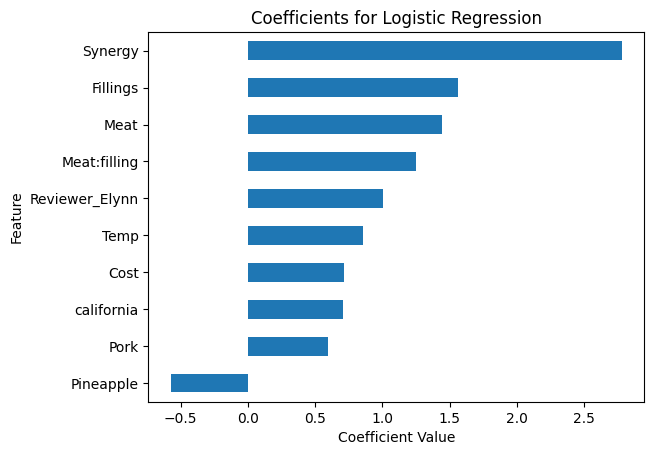

In [58]:
# Create your horizontal barchart here.
coefficients = model_logr.named_steps['logisticregression'].coef_
# coefficients
features = model_logr.named_steps['onehotencoder'].get_feature_names_out()
# features
feat_imp = pd.Series(coefficients[0], index=features).sort_values(key=abs)
feat_imp.tail(10).plot(kind='barh')

plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Coefficients for Logistic Regression')

There is more than one way to generate predictions with `model_logr`. For instance, you can use [`predict`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logisticregression) or [`predict_proba`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logisticregression#sklearn.linear_model.LogisticRegression.predict_proba).

**Task 9:** Generate predictions for `X_test` using both `predict` and `predict_proba`. Then below, write a summary of the differences in the output for these two methods. You should answer the following questions:

- What data type do `predict` and `predict_proba` output?
- What are the shapes of their different output?
- What numerical values are in the output?
- What do those numerical values represent?

In [35]:
# Write code here to explore the differences between `predict` and `predict_proba`.
from sklearn.metrics import accuracy_score
accuracy_score(y_test, model_logr.predict(X_test))

0.7894736842105263

In [49]:
y_pred = model_logr.predict(X_test)
y_pred[:20]

array([1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0])

In [50]:
y_pred_prob = model_logr.predict_proba(X_test)
y_pred_prob[:20]

array([[1.17710891e-05, 9.99988229e-01],
       [9.90216819e-04, 9.99009783e-01],
       [9.53675653e-01, 4.63243473e-02],
       [3.81239648e-05, 9.99961876e-01],
       [9.99611054e-01, 3.88946338e-04],
       [9.71695768e-01, 2.83042317e-02],
       [1.53228513e-02, 9.84677149e-01],
       [4.92314480e-05, 9.99950769e-01],
       [5.72713998e-05, 9.99942729e-01],
       [1.70485090e-01, 8.29514910e-01],
       [7.69384683e-01, 2.30615317e-01],
       [9.72227472e-01, 2.77725276e-02],
       [3.65099683e-01, 6.34900317e-01],
       [3.40013897e-01, 6.59986103e-01],
       [1.87873988e-02, 9.81212601e-01],
       [4.75740509e-02, 9.52425949e-01],
       [2.72001717e-02, 9.72799828e-01],
       [9.98657365e-01, 1.34263452e-03],
       [9.97372676e-01, 2.62732382e-03],
       [9.99591306e-01, 4.08694286e-04]])

**Give your written answer here:**

```
1. What data type do predict and predict_proba output?
predict outputs a numpy.ndarray; predict_proba outputs a numpy.ndarray

2. What are the shapes of their different output?
predict outputs an array and predict_proba outputs an array of arrays

3. What numerical values are in the output?
predict outputs an int and predict_proba outputs a float

4. What do those numerical values represent?
predict returns the class prediction of (great = 1, not great = 0)
predict_proba outputs the probability estimates of each classification (prob 0, prob 1) with a default classification threshold of 0.5

```
